In [25]:
import numpy as np
import scipy.optimize
import control
import matplotlib.pyplot as plt
import math
plt.style.use('dark_background')

In [198]:
M = 0.350 # kg
G = 9.8 # N/kg
E0 = 0.32722 # J
Vref = 2 * math.pi / (0.1 * 6)
Pmax = (7.2 / 2) * (Vref / 2) # JX B70 servo max power

K = np.linspace(385 / 2, 385 * 8, 20)
Vmax = np.linspace(Vref / 4, Vref * 2, 20) # rad/s

Tstall = Vmax * (Pmax / (Vmax / 2) ** 2)
R = 0.04

In [200]:
Xf = np.empty((K.shape[0], Vmax.shape[0], 3))
Xf[:] = np.nan
Z2_0 = (G * M + np.sqrt((G * M) ** 2 + 2 * K * E0)) / K
for ki, (k, z2_0_) in enumerate(zip(K, Z2_0)):
    for vi, (vmax_, t0) in enumerate(zip(Vmax, Tstall)):
        T0 = 2 * math.pi * math.sqrt(M / k)
        vmax = vmax_ * R
        F0 = t0 / R
        z2_0 = min(z2_0_, F0 / k)
#         if F0 / k < z2_0_:
        print(F0 / k, z2_0_)
#         print(k * z2_0 ** 2 / 2 - G * M * z2_0)
        Fl_0 = z2_0 * k

        A = np.array([
            # z1', z2, z1
            [0, -k / M, 0], # z1''
            [1, -k * vmax / F0, 0], # z2'
            [1, 0, 0], # z1'
        ])
        B = np.array([-G, -vmax, 0])[...,np.newaxis]
        C = np.eye(3)
        D = np.zeros((3, 1))

        SS = control.StateSpace(A, B, C, D)
        T = np.linspace(0, T0 * 2) # two natural periods to sim the whole thing
        Tout, _, xout = control.forced_response(SS, T, np.ones(T.shape[0]), X0=[0, -z2_0, -z2_0])
    #     [plt.plot(Tout, x) for x in xout]

        if np.any(xout[1] > 0):
            xf = np.nonzero((xout[1, 1:] > 0) ^ (xout[1, :-1] > 0))[0][0]
            x_ = np.dot(A, xout) + B
#             print((x_[2] - x_[1]) / vmax)
#             plt.plot((Tout / T0)[:xf], (xout[2] - xout[1])[:xf]) # ((-k / M * xout[1]))[:xf])
            xfi = lambda l: (l[xf + 1] - l[xf]) * (-xout[1][xf]) / (xout[1][xf + 1] - xout[1][xf]) + l[xf]
            Xf[ki, vi] = [xfi(x) for x in xout]
#             xi = lambda j: lambda t: np.interp(t, Tout, xout[j])
#             tf = scipy.optimize.fsolve(xi(1), T0 / 3)
#             Vf[ki, vi] = xi(0)(tf)
#         break
#     break

3.740259740259741 0.07878682880164453
2.7332667332667335 0.07878682880164453
2.153482880755608 0.07878682880164453
1.776623376623377 0.07878682880164453
1.5120198949986188 0.07878682880164453
1.3160173160173163 0.07878682880164453
1.164998935490739 0.07878682880164453
1.0450725744843394 0.07878682880164453
0.9475324675324677 0.07878682880164453
0.8666455495723789 0.07878682880164453
0.7984824164599447 0.07878682880164453
0.7402597402597404 0.07878682880164453
0.689950825873156 0.07878682880164453
0.6460448642266825 0.07878682880164453
0.6073926073926075 0.07878682880164453
0.5731043150397992 0.07878682880164453
0.542480420343016 0.07878682880164453
0.5149632975719933 0.07878682880164453
0.49010300044782806 0.07878682880164453
0.46753246753246763 0.07878682880164453
2.0901451489686784 0.0546670843423521
1.5274137627078803 0.0546670843423521
1.2034169039516631 0.0546670843423521
0.9928189457601223 0.0546670843423521
0.8449522942639339 0.0546670843423521
0.7354214413037944 0.0546670843423

0.12564989449411562 0.019797850571575487
0.11123105414233186 0.019797850571575487
0.09978079856885652 0.019797850571575487
0.09046792403576324 0.019797850571575487
0.08274505247173466 0.019797850571575487
0.07623701463687914 0.019797850571575487
0.07067806565294003 0.019797850571575487
0.06587470196778876 0.019797850571575487
0.061682675478929486 0.019797850571575487
0.057992258997284135 0.019797850571575487
0.05471850244098585 0.019797850571575487
0.05179461299757439 0.019797850571575487
0.04916735001943655 0.019797850571575487
0.046793753811601675 0.019797850571575487
0.04463877830712002 0.019797850571575487
0.3320791358174536 0.019027450896080256
0.2426732146358314 0.019027450896080256
0.19119707819792778 0.019027450896080256
0.15773758951329045 0.019027450896080256
0.13424475703258762 0.019027450896080256
0.11684265889873367 0.019027450896080256
0.10343448492674784 0.019027450896080256
0.09278681736075908 0.019027450896080256
0.08412671440708824 0.019027450896080256
0.0769451656162

<ipython-input-203-a7b07014f829>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(Vmax, K, (Xf[:,:,2] - Xf[:,:,1]) / Z2_0[:,np.newaxis]) # Y = spring constants, X =
<ipython-input-203-a7b07014f829>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(Vmax, K, DE) # Y = spring constants, X =


Text(0.5, 1.0, 'Single-jump energy gain (E0 = 0.33J, R=0.040m, M=0.350kg)')

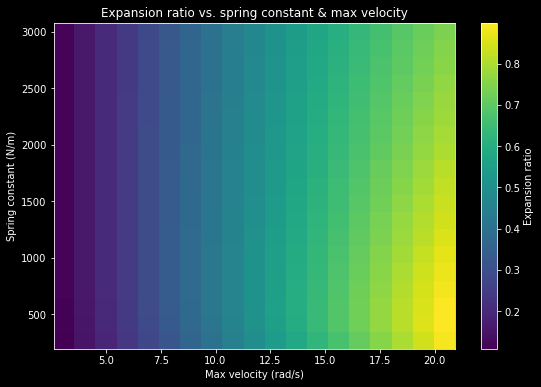

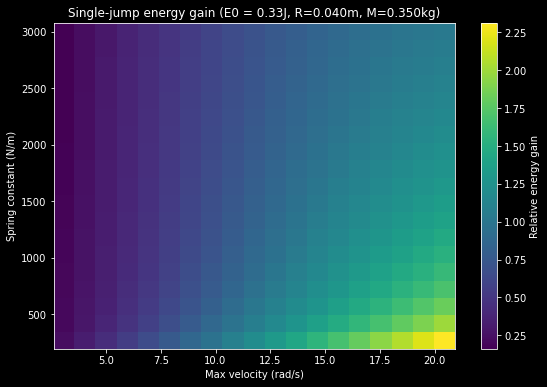

In [203]:
DE = (M * (Xf[:,:,0] ** 2 / 2 + Xf[:,:,2] * G) - E0) / E0
plt.figure(figsize=(9,6))
plt.pcolor(Vmax, K, (Xf[:,:,2] - Xf[:,:,1]) / Z2_0[:,np.newaxis]) # Y = spring constants, X = 
plt.ylabel('Spring constant (N/m)')
plt.xlabel('Max velocity (rad/s)')
plt.colorbar(label='Expansion ratio')
plt.title('Expansion ratio vs. spring constant & max velocity')

plt.figure(figsize=(9,6))
plt.pcolor(Vmax, K, DE) # Y = spring constants, X = 
plt.ylabel('Spring constant (N/m)')
plt.xlabel('Max velocity (rad/s)')
plt.colorbar(label='Relative energy gain')
plt.title('Single-jump energy gain (E0 = %.2fJ, R=%.3fm, M=%.3fkg)' % (E0, R, M))